In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pickle.load(open("analysis.pickle", "rb"))

In [3]:
total_classes = 0
packages_where_class = 0
classes_in_packages = []
distribution = {}

In [4]:
print("Total number of packages is", len(data))

Total number of packages is 5827


In [5]:
for package in data:
    files = data[package]
    classes = 0
    for file in files:
        if file == "failed":
            continue
        classes += len(file)
        total_classes += len(file)
    classes_in_packages.append((package, classes))

    if distribution.get(classes) == None:
        distribution[classes] = 1
    else:
        distribution[classes] += 1

    if classes > 0:
        packages_where_class += 1

In [6]:
print("Number of packages with classes is", packages_where_class, "out of", len(data))
print("Total number of classes is", total_classes)
print(
    "Mean number of classes in packages where there are classes is",
    round(total_classes / (packages_where_class or 1)),
)

Number of packages with classes is 5127 out of 5827
Total number of classes is 2062232
Mean number of classes in packages where there are classes is 402


In [7]:
classes_in_packages.sort(key=lambda p: p[1], reverse=True)
n = 20
print("Top", n, "packages:")
for (p, c) in classes_in_packages[:n]:
    print(" - ", p, "has", c, "classes")

Top 20 packages:
 -  piglit has 128003 classes
 -  libwine-development has 71455 classes
 -  libvtk7.1 has 52660 classes
 -  libwine has 51007 classes
 -  libvtk6.3 has 50416 classes
 -  sagemath has 44607 classes
 -  paraview has 30248 classes
 -  vlc-plugin-base has 29768 classes
 -  grass-core has 22130 classes
 -  eso-midas has 21816 classes
 -  libmia-2.4-4 has 20238 classes
 -  libglib2.0-tests has 17358 classes
 -  gnucash has 15972 classes
 -  scalapack-mpi-test has 15344 classes
 -  libc6 has 12082 classes
 -  krita has 12020 classes
 -  libopenmpi3 has 11988 classes
 -  libmagickcore-6.q16hdri-6 has 11932 classes
 -  libwildmagic-examples has 11124 classes
 -  libmagickcore-6.q16-6 has 10972 classes


In [8]:
x = range(classes_in_packages[20][1])
y = [distribution.get(v) or 0 for v in x]

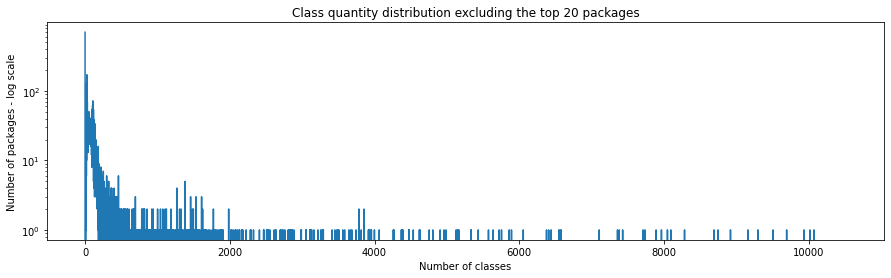

In [9]:
plt.figure(figsize=(15,4))
plt.plot(x, y)
plt.yscale('log')
plt.title("Class quantity distribution excluding the top 20 packages")
plt.xlabel("Number of classes")
plt.ylabel("Number of packages - log scale")
plt.show()

In [10]:
print("20 classes from a random package\n")
print("\n".join([str(c) for c in data["ardour"]["ardour/usr/lib/ardour5/ardour-5.12.0"]][0:20]))

20 classes from a random package

class	boost::bad_weak_ptr
class	Gtk::ComboBoxText::TextModelColumns
class	InstrumentSelector::InstrumentListColumns
class	AddRouteDialog::TrackTemplateColumns
class	boost::exception
class	boost::exception_detail::error_info_injector<boost::bad_weak_ptr>	inherits from boost::exception, boost::bad_weak_ptr
class	boost::exception_detail::clone_base
class	boost::exception_detail::clone_impl<boost::exception_detail::error_info_injector<boost::bad_weak_ptr>>	inherits from boost::exception_detail::error_info_injector<boost::bad_weak_ptr>, boost::exception_detail::clone_base
class	AnalysisWindow::TrackListColumns
class	PBD::SignalBase
class	PBD::Signal0<void, PBD::OptionalLastValue<void>>	inherits from PBD::SignalBase
class	failed_constructor
class	PBD::Signal2<void, unsigned long, unsigned long, PBD::OptionalLastValue<void>>	inherits from PBD::SignalBase
class	PBD::Destructible
class	PBD::Signal2<void, bool, PBD::Controllable::GroupControlDisposition, PBD::Op